## Linear Regression with 2D data

1. Build graph
2. Initiate the session
3. Feed Data In and get Output
4. Choose cost function
5. Train

Graph: wx+b=z

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100, (5,5))

In [4]:
rand_b = np.random.uniform(0,100, (5,1))

In [6]:
a = tf.placeholder(tf.float32)

In [7]:
b = tf.placeholder(tf.float32)

In [8]:
add_op = a + b

In [9]:
mul_op = a * b

In [11]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:10, b:20})
    print(add_result)
    
    mul_result = sess.run(mul_op, feed_dict={a:10, b:20})
    print(mul_result)

30.0
200.0


In [12]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Simple neural network with TensorFlow

In [21]:
n_features = 10
n_dense_neurons = 3

In [22]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))

In [23]:
# Variables for w and b
b = tf.Variable(tf.zeros([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [24]:
xW = tf.matmul(x,W)

In [25]:
z = tf.add(xW,b)

In [26]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

In [27]:
# variable initializer
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [29]:
print(layer_out)

[[0.44122645 0.5048489  0.4097879 ]]


## Complete example

In [33]:
import matplotlib.pyplot as plt

In [30]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [31]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

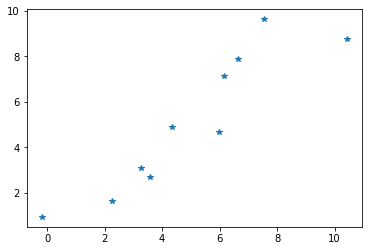

In [34]:
plt.plot(x_data,y_label,'*')

In [35]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

## Cost Function

In [36]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


## Optimizer

In [37]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    
    for i in range(epochs):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [46]:
final_slope, final_intercept

(0.95723337, 0.33790448)

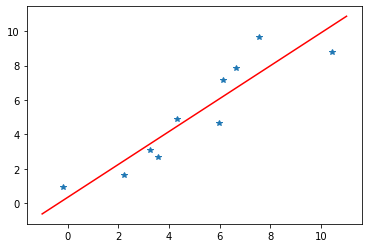

In [47]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')